In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

In [2]:
import numpy as np
from shapely.geometry import Polygon
from matplotlib import pyplot as plt
import random

# Rasterize image

In [3]:
dims = np.array([1000, 1000])
img = np.zeros(dims)

In [4]:
def gen_square(lower, upper, dims):
    return Polygon([dims * lower, [dims[0]*lower, dims[1]*upper], dims * upper, [dims[0]*upper, dims[1]*lower]])

In [5]:
import skimage.draw as imdraw
from rasterio.features import rasterize

In [6]:
for i in range(100):
    poly = gen_square(random.uniform(0.1, 0.49), random.uniform(0.5, 0.66), dims)
    rr, cc = imdraw.polygon(*poly.boundary.coords.xy)
    img = np.zeros(dims)
    img[rr, cc] = 1

In [7]:
for i in range(100):
    poly = gen_square(random.uniform(0.1, 0.49), random.uniform(0.5, 0.66), dims)
    mask = rasterize([poly], img.shape)
    img = np.zeros(dims)
    img[mask.astype(bool)] = 1

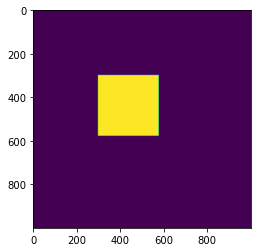

In [8]:
plt.imshow(img)

# Geometry projection

In [9]:
import geopandas as gpd
from geopandas import GeoSeries
from geopandas.base import GeometryArray, GeometryDtype
from geopandas.array import from_shapely
from geopandas._vectorized import transform
import pygeos
import shapely.ops
from pyspatialkit.utils.linalg import projective_transform_from_pts
from pyspatialkit.utils.geopandas import projective_transform

In [29]:
pts_source = np.array([[0,1], [1,1], [1,0], [0,0]])
pts_dest = np.array([[3,10], [8,10], [8,5], [3,5]])
transform_mat = projective_transform_from_pts(pts_source, pts_dest)

In [51]:
dims = np.array([100,100])
lower = 0.33
upper = 0.66
vals = np.array([dims * lower, [dims[0]*lower, dims[1]*upper], dims * upper, [dims[0]*upper, dims[1]*lower]])
polies = [Polygon(vals) for i in range(100000)]

In [52]:
res = []
def transform_function(x, y):
        x = np.array(x)
        y = np.array(y)
        tmp = np.stack([x, y, np.ones(len(x))], axis=0)
        tmp = transform_mat @ tmp
        tmp = tmp.T
        return tmp[:,0]/tmp[:, 2], tmp[:, 1]/tmp[:, 2]
for poly in polies:
    res.append(shapely.ops.transform(transform_function, poly))

In [53]:
ds = GeoSeries(polies)
res = projective_transform(ds, transform_mat)

# Calculate projective transformation

In [ ]:
from skimage import transform
from pyspatialkit.utils.linalg import projective_transform_from_pts
pts_source = np.array([[0,1], [1,1], [1,0], [0,0]])
pts_dest = np.array([[3,10], [8,10], [8,5], [3,5]])

In [ ]:
for i in range(30000):
    trans = projective_transform_from_pts(pts_source + i, pts_dest + i)

In [ ]:
for i in range(30000):
    trans = transform.estimate_transform('projective', pts_source + i, pts_dest + i).params